# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modelled as follow:
$$
x_e(t,u) = x(t,u)e(t,u)\quad \text{with}\quad e(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_e,u - lT_e)
$$ $e$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_e$ writes:
$$
X_e(f,g) = \frac1{T_e^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_e,g-lf_e)
$$
2D sampling then implies a periodisation of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if 2D Shannon condition is verified (band limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_e(kT_e,lT_e) \operatorname{sinc}(\pi f_e (t-kT_e)) \operatorname{sinc}(\pi f_e(u - lT_e))\qquad\qquad\qquad\text{(1)}
$$
so called Shannon interpolation.
 
## Exercice 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>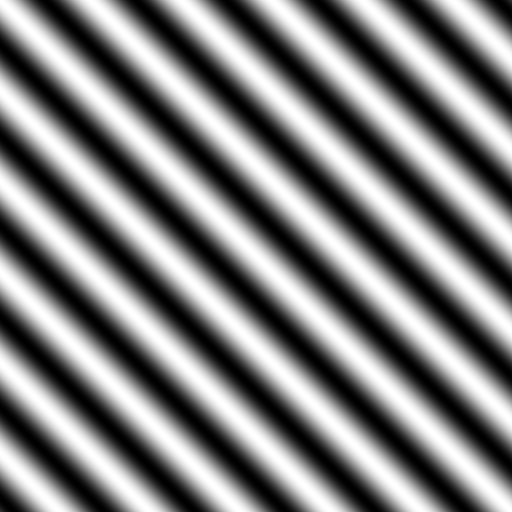</div>
The goal of this exercice is to study the limit conditions of sampling of this image in order to avoid aliasing.

In [38]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
# %matplotlib notebook 
%matplotlib inline
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Te, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Te-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Te-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig, ax = plt.subplots(figsize=(600/80,600/80),subplot_kw=dict(projection='3d'))
    if title: plt.title(title)
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    

    

1. We provide the function `sinusoid2d(A, theta, L, T0, Te)` that allows to sample signal $s_\theta$ with a sampling period of `Te` (the grid is regular with the sample sampling value for directions $u$ and $t$). Paremeters `A`, `theta`, `L` and `T0` respectively control the amplitude, orientation and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `Te=1`.


[[ 1.          0.9975914   0.99037719 ... -0.7128209  -0.66245561
  -0.60889914]
 [ 0.9975914   1.          0.9975914  ... -0.75975238 -0.7128209
  -0.66245561]
 [ 0.99037719  0.9975914   1.         ... -0.80302397 -0.75975238
  -0.7128209 ]
 ...
 [-0.7128209  -0.75975238 -0.80302397 ...  1.          0.9975914
   0.99037719]
 [-0.66245561 -0.7128209  -0.75975238 ...  0.9975914   1.
   0.9975914 ]
 [-0.60889914 -0.66245561 -0.7128209  ...  0.99037719  0.9975914
   1.        ]]


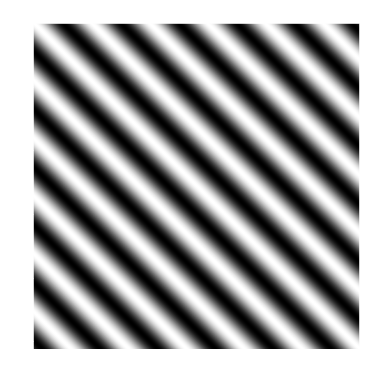

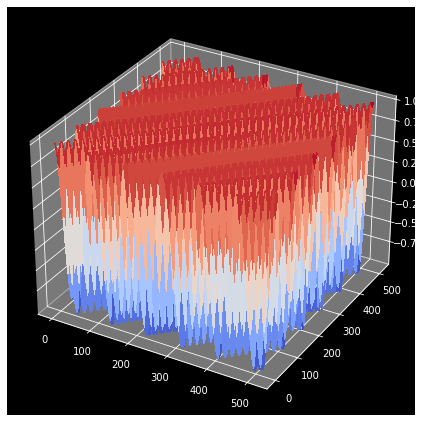

In [39]:
# - 1 - 
s_45 = sinusoid2d(1, 45, 512, 64, 1)

# Shape of the array
print(s_45)

# Show image
imshow(s_45, "Sinusoid")
surf(s_45)

# Interpretation:
# The first figure represents the sinusoid 2D in 2 dimensions. 
# The second figure represents the sinusoid 2 D in 3 dimensions.
# It is the same view as, the second figure but eagle eyed view.

2. (a) What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ can be used to derive the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

In [40]:
# - 2 -
# Function 𝑠𝜃(𝑡,𝑢)=𝐴cos(2𝜋𝑓0(𝑡cos𝜃+𝑢sin𝜃))
# If sin𝜃 = 0 :
#     Then 𝑠𝜃(𝑡,𝑢)=𝐴cos(2𝜋𝑓0𝑡)
# If cos𝜃 = 0 :
#     Then 𝑠𝜃(𝑡,𝑢)=𝐴cos(2𝜋𝑓0u)

# The maximum frequences :
#     Over t is f_m_t = 𝑓0cos𝜃
#     Over u is f_m_u = 𝑓0sin𝜃

# The maximum the frequency of the 2 above is :
#     fm = max(f_m_t, f_m_u)
#        = max(𝑓0cos𝜃, 𝑓0sin𝜃)
#        = 𝑓0 * max(cos𝜃, sin𝜃)

# Shannon sens :
#     The sampling frequency should be  > to 2 * 𝑓0
#     To be sure, we put fm = 𝑓0
#     it means that the maximum frequency should be computed because we need to derive 
#         the sampling frequency as computed above.

2. (b)  Sample $s_{45}$ with $f_e = 16 f_m$ and display the sampled signal.

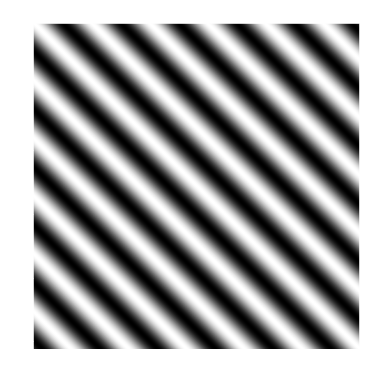

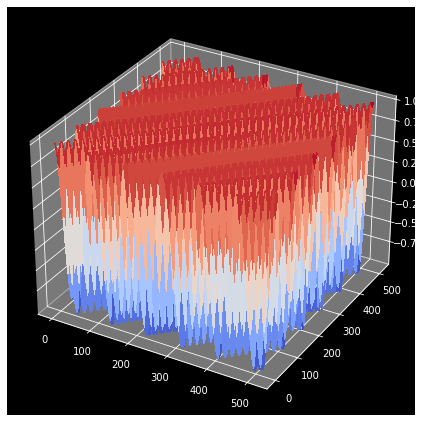

In [41]:
# - 2 - 
theta = 45
T0 = 64
f0 = 1 / T0
fm = f0 * max(np.cos(theta), np.sin(theta))
fe = 16 * fm
Te = 1 / fe

sampled_s_45 = sinusoid2d(1, 45, 512, T0, Te)

# Show image
imshow(s_45, "Sinusoid")

# Show surf
surf(s_45)

2. (c) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

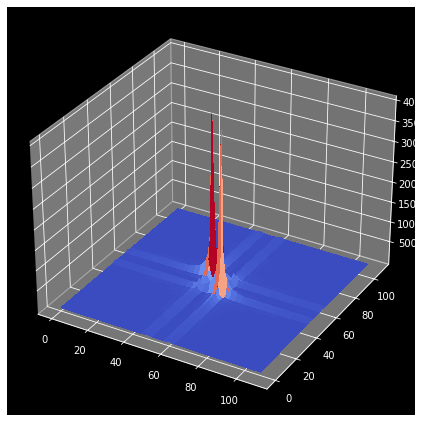

In [42]:
# Compute the sample signal


# Compute the FT
FT_sampled_s_45 = np.abs(fftshift(fft2(sampled_s_45)))

# Show surf
surf(FT_sampled_s_45)

# Interpretations :
#     Computing the fourier transform of s_45 seems to have two peaks caracteristic of the Dirac function.
#     The base if however a little bit different, due to the sinusoid.

2. (d) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_e$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of theses differences?
    - (Bonus question):
        - Why, aside the two Dirac peaks, there are somes structures? Explain the origin of these lobes.
        - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfer.

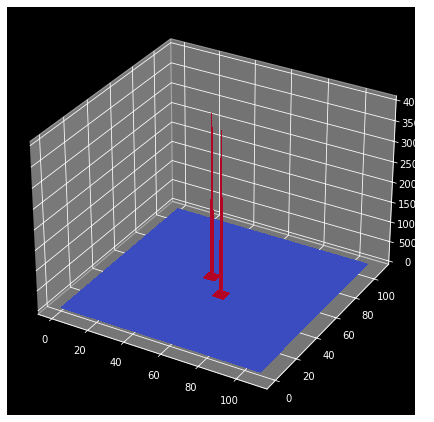

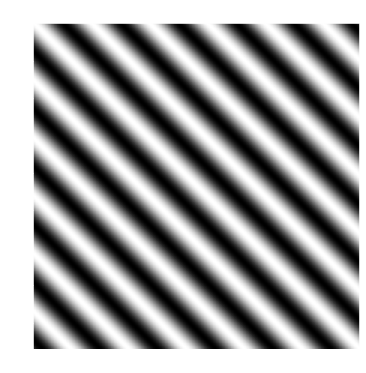

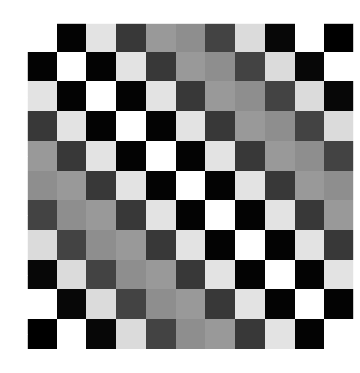

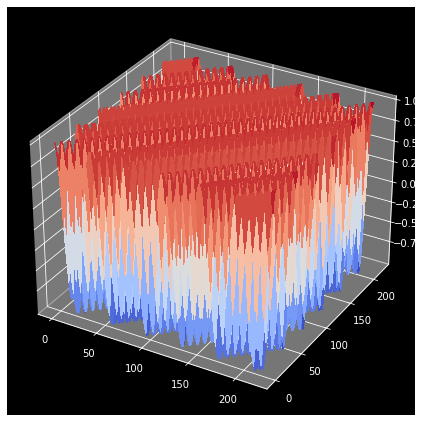

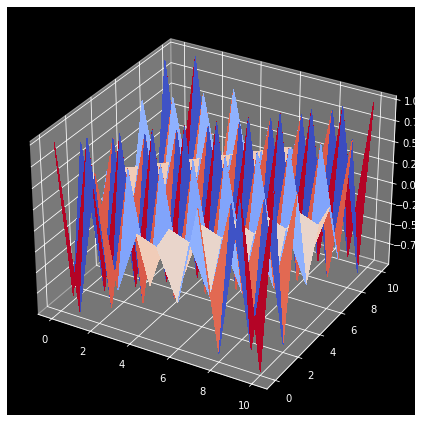

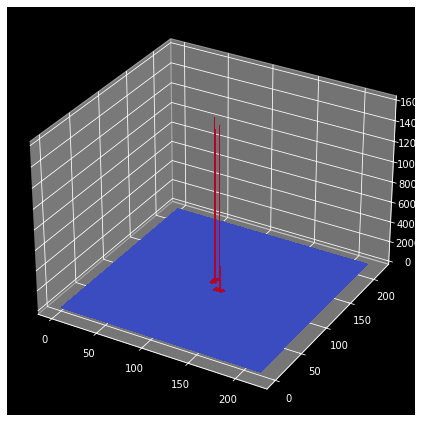

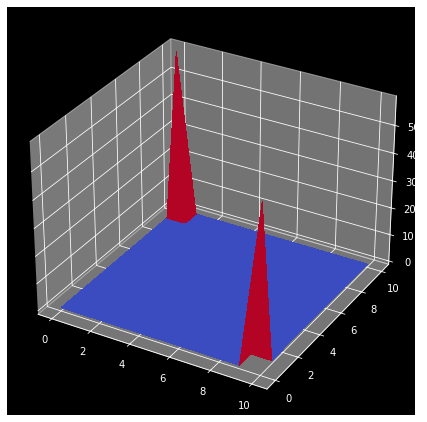

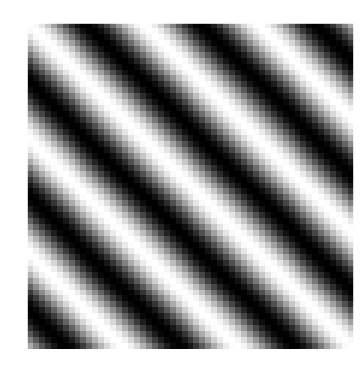

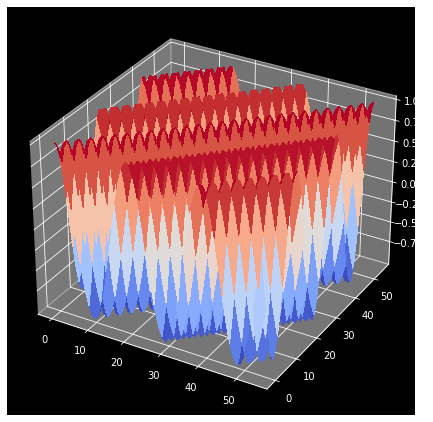

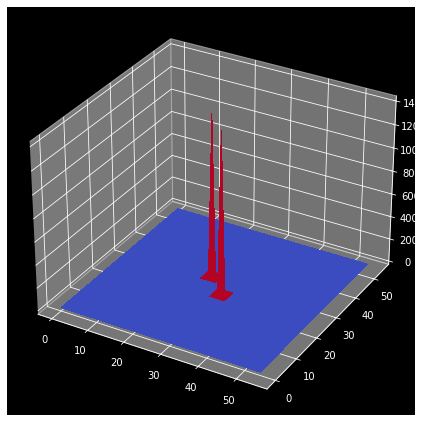

In [43]:
# - 2 -
# 1 ) Verifying the presence of the two Dirac peaks :
def threshold(I,s):
    """ Array*int -> Array """
    
    new_arr = I.copy()
    new_arr[new_arr < s] = 0
    
    return new_arr

# Apply thresholding to extract Dirac peaks :
dirac_peaks = threshold(FT_sampled_s_45, FT_sampled_s_45.max())

# Show surf
surf(dirac_peaks)

# Interpretations :
#    To be sure that we have 2 peaks, we apply a threshold in order to select only the maximum values.
#    At the end, we have two peaks typical of a Dirac function.



# 2) Various values of Te :
fe_bis_1 = 32 * fm        # fe > 2 * fm
fe_bis_2 = (3 / 2) * fm   # fe < 2 * fm

Te_bis_1 = 1 / fe_bis_1
Te_bis_2 = 1 / fe_bis_2

s_45_bis_1 = sinusoid2d(1, 45, 512, T0, Te_bis_1)
s_45_bis_2 = sinusoid2d(1, 45, 512, T0, Te_bis_2)


# Show images
imshow(s_45_bis_1, "Sinusoid 1")
imshow(s_45_bis_2, "Sinusoid 2")

# Show surf
surf(s_45_bis_1)
surf(s_45_bis_2)

# Compute the FT
FT_s_45_bis_1 = np.abs(fftshift(fft2(s_45_bis_1)))
FT_s_45_bis_2 = np.abs(fftshift(fft2(s_45_bis_2)))

# Apply thresholding to extract Dirac peaks :
dirac_peaks_1 = threshold(FT_s_45_bis_1, FT_s_45_bis_1.max())
dirac_peaks_2 = threshold(FT_s_45_bis_2, FT_s_45_bis_2.max())


# Show surf
surf(dirac_peaks_1)
surf(dirac_peaks_2)

# Interpretation :
#    If the frequency of sampling is superior to 2 * f_max, the two peaks still visible and remain.
#    If the frequency of sampling is inferior to 2 * f_max, the two peaks are cut off. Thus, it show 
#        that this condition should be respected.



# 3 ) Bonus :
# Inside the two peaks, there are some structures because of the noise in the sinus cardinal.
# Even if, in positive and negative side the sinus cardinal tend to zero, if T0 is to small, 
#    the two peaks will not been enaught seperated.


# 4 ) Bonus :
theta = 45
T0 = 128
f0 = 1 / T0
fm = f0 * max(np.cos(theta), np.sin(theta))
fe = 16 * fm
Te = 1 / fe
s_45_bis_1 = sinusoid2d(1, 45, 512, T0, Te)

# Show images
imshow(s_45_bis_1, "Sinusoid 1")

# Show surf
surf(s_45_bis_1)

# Compute the FT
FT_s_45_bis_1 = np.abs(fftshift(fft2(s_45_bis_1)))

# Apply thresholding to extract Dirac peaks :
dirac_peaks_1 = threshold(FT_s_45_bis_1, FT_s_45_bis_1.max())

# Show surf
surf(dirac_peaks_1)

3. (a) Sample $s_{45}$ with $f_0=4 f_e$ and display the sampled signal.

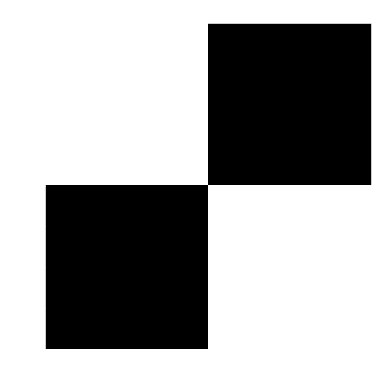

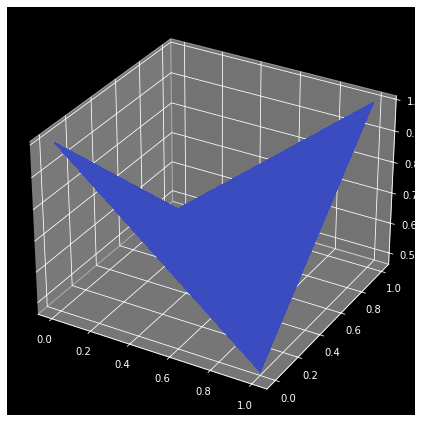

In [44]:
# - 3 a -
# f0 = 1 / T0   and fe = 1 / 4*T0
theta = 45
T0 = 64
f0 = 1 / T0
fe = f0 / 4
Te = 1 / fe
sample_2_s_45 = sinusoid2d(1, 45, 512, T0, Te)

# Show images
imshow(sample_2_s_45, "Sinusoid 1")

# Show surf
surf(sample_2_s_45)

# Interpretation :
#    If the signal is 4 times f0 bigger, thus, the period is 4 times more little superior.
#    The surf image demonstrate what we said above, it does not shows the 2 peaks but only 
#         what there is between them.

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [45]:
# - 3 b - 
def error(A, L, xr, xd):
    """
    int * int * Array[Array] * Array[Array]
    Return the relative average error e_r"""
    err = 0
    
    for k in range(L):
        for l in range(L):
            err += np.abs(xr[k][l] - xd[k][l])
            
    err *= 1 / (2 * A * (L ** 2))
    
    return err

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

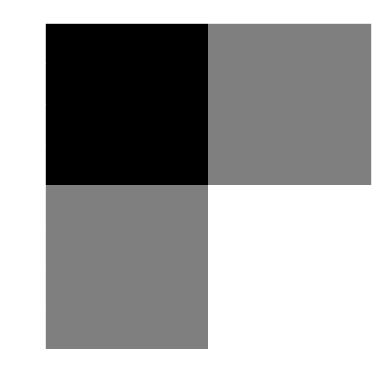

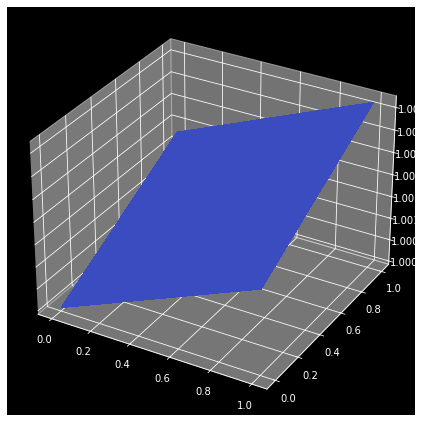

In [46]:
# - 3 c -
# Use of Shonnon interpolation formula : rec_s_45(I, Te, size)
size = sample_2_s_45.shape[0]
rec_2_s_45 = shannonInterpolation(sample_2_s_45, Te, size)

# Show images
imshow(rec_2_s_45, "Reconstructed sample signal")

# Show surf
surf(rec_2_s_45)

# Interpretation :
#    Visual interoretation : the reconstructed signal hows a blurred checkerboard. The more we increase the size,
#                            the more the checkerboard is "precise" and the less it is blurred. But in order to 
#                            compare the 2 signals, we have to choose a size of 2.

In [47]:
# Compute the relative average error :
A = 1
lenght = sample_2_s_45.shape[0]
rel_err_2_s_45 = error(A, lenght, rec_2_s_45, sample_2_s_45)

print("Relative average error between the 2 signals : {}".format(rel_err_2_s_45))

# Interpretation :
#     The relative average error between the 2 signals is about equal to 0.1326.
#     It means that the difference between them is not so hight.

Relative average error between the 2 signals : 0.13264941528763574


4. Same question than 3. with $f_e = \frac32f_m$. Comment the effects of aliasing.

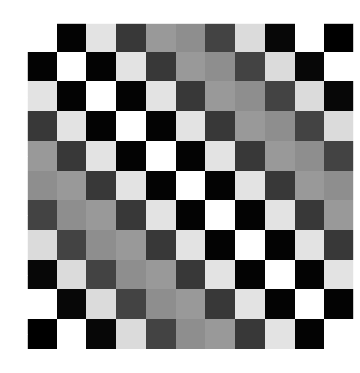

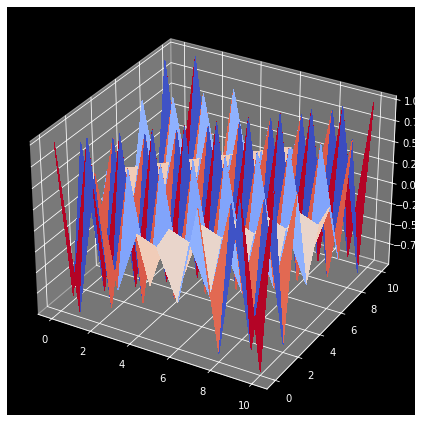

In [48]:
# - 4 -
theta = 45
T0 = 64
f0 = 1 / T0
fm = f0 * max(np.cos(theta), np.sin(theta))
fe = (3 / 2) * fm
Te = 1 / fe
sample_3_s_45 = sinusoid2d(1, 45, 512, T0, Te)

# Show images
imshow(sample_3_s_45, "Sinusoid 1")

# Show surf
surf(sample_3_s_45)

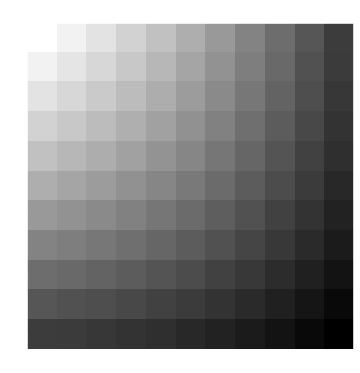

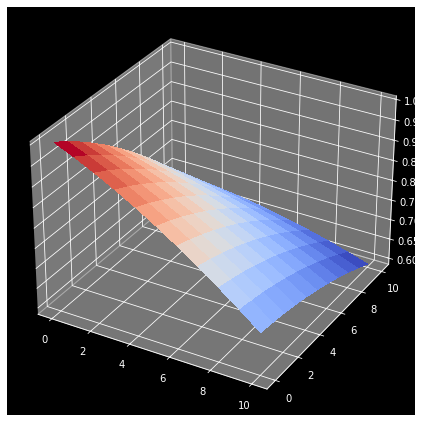

In [49]:
# Use of Shonnon interpolation formula : rec_s_45(I, Te, size)
size = sample_3_s_45.shape[0]
rec_3_s_45 = shannonInterpolation(sample_3_s_45, Te, size)

# Show images
imshow(rec_3_s_45, "Reconstructed sample signal")

# Show surf
surf(rec_3_s_45)

In [50]:
# Compute the relative average error :
A = 1
lenght = sample_3_s_45.shape[0]
rel_err_3_s_45 = error(A, lenght, rec_3_s_45, sample_3_s_45)

print("Relative average error between the 2 signals : {}".format(rel_err_3_s_45))

# Interpretation :
#    Visual interpretation : The reconstructed image shows a color chart in diagonal. 
#                            Whereas the original image shows a checkerboard without a color chart. 

# Interpretation :
#     The relative average error between the 2 signals is about equal to 0.4198.
#     It means that the difference between them is mush hight than the precedent tests. It must be 
#     due to the fact that we have not respected the Shannon rule (fe > 2*fm)

Relative average error between the 2 signals : 0.4197865898718905


5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_e$ what is the additional drawback appearing after the reconstruction? Explain.

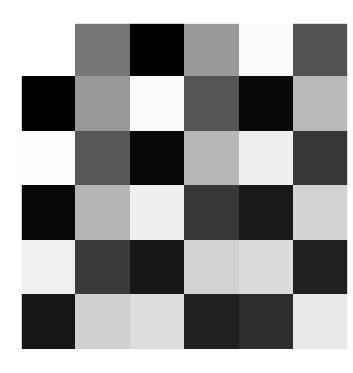

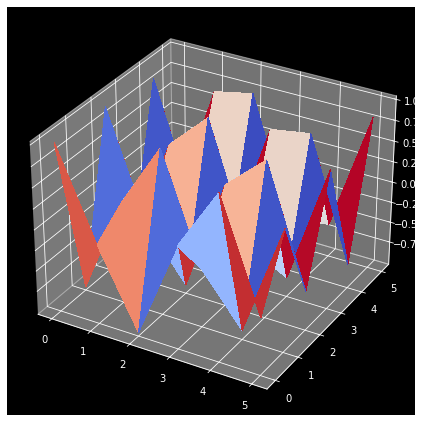

In [51]:
# - 5 -
theta = 190    # 190 deg  = 10 deg + 180 deg 
T0 = 64
f0 = 1 / T0
fm = f0 * max(np.cos(theta), np.sin(theta))
fe = (2 / 3) * fm
Te = 1 / fe

# Compute the sinusoid 2D
sample_4_s_10 = sinusoid2d(1, theta, 512, T0, Te)

# Show images
imshow(sample_4_s_10, "Sample signal")

# Show surf
surf(sample_4_s_10)

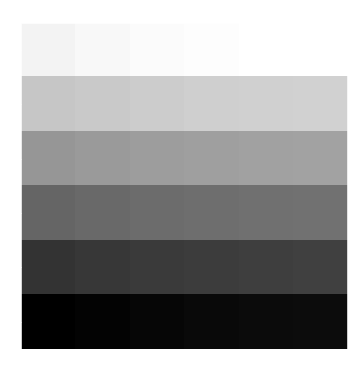

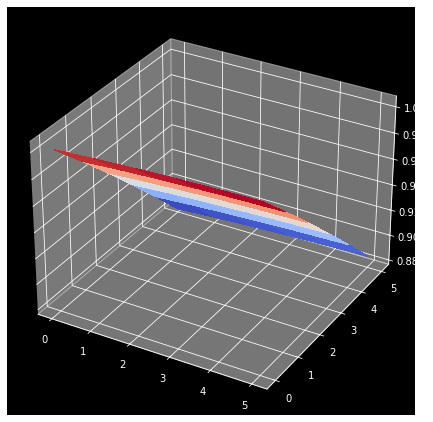

Relative average error between the 2 signals : 0.4661219767770477


In [52]:
# Use of Shonnon interpolation formula : rec_s_45(I, Te, size)
size = sample_4_s_10.shape[0]
rec_4_s_10 = shannonInterpolation(sample_4_s_10, Te, size)

# Show images
imshow(rec_4_s_10, "Reconstructed sample signal")

# Show surf
surf(rec_4_s_10)

# Compute the relative average error :
A = 1
lenght = sample_4_s_10.shape[0]
rel_err_4_s_10 = error(A, lenght, rec_4_s_10, sample_4_s_10)

print("Relative average error between the 2 signals : {}".format(rel_err_4_s_10))

# Interpretation :
#      The reconstructed signal is not the same as the original at all.
#      Changing the theta rotation modify the structure of the image. That is to say that we 
#      have not any diagonal anymore. Thus, the rotation make it difficult to retrieve the original signal.

6. Bonus question: write a function `shannonInterpolationLoop()` implementing equation (1) using two loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_e(kT_e,lT_e) \operatorname{sinc}(\pi f_e (t-kT_e)) \operatorname{sinc}(\pi f_e(u - lT_e))\qquad\qquad\qquad\text{(1)}
$$

`
def shannonInterpolation(I, Te, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Te-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Te-y)
    return np.matmul(X.T, np.matmul(I, Y))
`

In [53]:
from time import process_time

mytime = 0

def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

### your code starts below
def shannonInterpolationLoop(I, Te, size):
    """ Array*int*double -> Array[double]  """
    n, m = I.shape
    
    # x = [ [0, 1, ..., size],
    #              ....
    #       [0, 1, ..., size]] with n rows

    # y = [ [0, 1, ..., n],
    #              ....
    #       [0, 1, ..., n]] with size rows
    x = []
    y = []
    
    # Building manually meshgrid x
    for j in range(n):
        x.append(np.arange(0, size))
    
    # Building manually meshgrid y
    for i in range(size):
        y.append(np.arange(0, n))
    
    # Applying sinc functions
    x = np.array(x)
    y = np.array(y)
    
    Y = np.sinc(x/Te-y)
    X = np.sinc(x/Te-y)
    
    res = np.matmul(X.T, np.matmul(I, Y))
    
    return res

In [54]:
# Test of 6 :
L = 64
theta = 45
T0 = 64
f0 = 1 / T0
fe = f0 / 4
Te = 1 / fe
sample_6_s_45 = sinusoid2d(1, theta, L, T0, Te)

size = sample_6_s_45.shape[0]

# Compute shannon interpolation using 2 loops :
tic()
sh_inter_loop = shannonInterpolationLoop(sample_6_s_45, Te, size)
tac()

# Compute shannon interpolation using 2 meshgrids :
tic()
sh_inter = shannonInterpolation(sample_6_s_45, Te, size)
tac()

# Interpretation :
#      The time taken by our function is highter than the one using meshgrid.
#      Thus, it seems that the second method is more optimized. It is more relevant when shapes of matrix 
#            are bigger.

0.0
0.0



## Exercice 2: aliasing on natural images

In this exercice, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

In [55]:
from PIL import Image

barbara = np.array(Image.open('img/barbara.png'))

def subSample2(I):
    """ Array -> Array """
    return I[::2,::2]

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

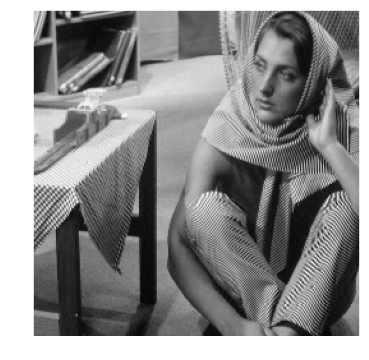

In [56]:
# - 1 -
sub_2 = subSample2(barbara)

imshow(sub_2)

# Interpretation :
#    Subsammpling the image by a factor 2 is equivalent to divide the resolution by 2. 
#    This process creates an aliasing effect that we can see on the image, stripes are 
#         appearing on Barbara's cloths and the tablecloths. 
#    More generally, if we take 1 over 2 values (pixels), we may miss the edges.

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

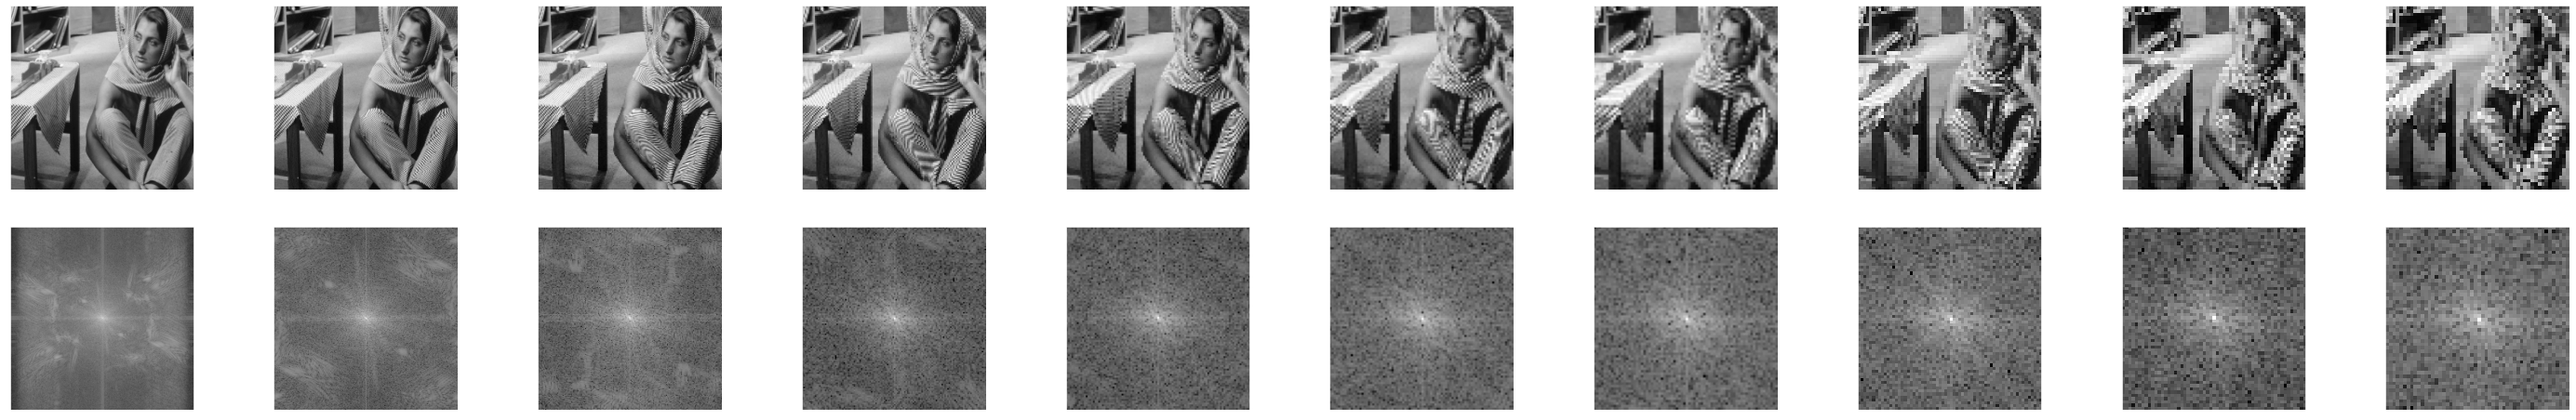

In [80]:
# - 2 -
def subSampleN(I,n): 
    """SubSample N times a given picture, computes and displays 
    the Fourrier transform for 0 to n subsampling """
    fig ,axes = plt.subplots(2, n, figsize=(5*n,8))
    for i in range(1,n+1):
        tmp = I[::i,::i]
        ax = axes[0,i-1]
        ax.imshow(tmp)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

        ax = axes[1,i-1]
        tmpShift = np.log(1+np.abs(fftshift(fft2(tmp))))
        ax.imshow(tmpShift)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

subSampleN(barbara, 10)


# On peut voir que plus l'image est "échantillonnée", plus la résolution est réduite et plus l'image est floue.
# L'aliasing ici a un effet de mixage/fusion des pixels ce qui résulte par une unification des pixels de proche en proche
# Cet effet est visible surtout sur le spectre qui tend de plus en plus vers des teintes unies de gris.

# Interpretation :
#     The more we divide the image resolution, the more it becomes blurred and the more the 
#          frequences are concentrated in the center of the spectrum.
#     The effect of aliasing is more important when we increase the factor of subsampling. In an natural image, 
#          we have a lot of variations of frequences. When the input frequency is greater than half the sample 
#          frequency, the sampled points do not adequately represent the input signal. Inputs at these higher 
#          frequencies are observed at a lower. Thus, when we reconstruct the original image, we may loss 
#          information.

3. Bonus question: same question with the image `img/mandrill.png`.

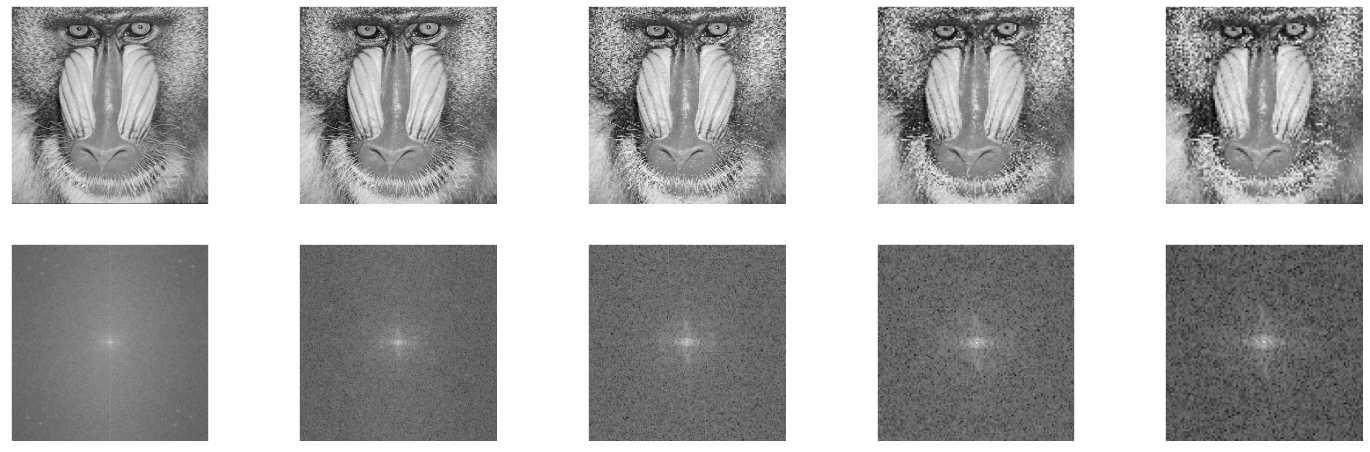

In [81]:
mandrill = np.array(Image.open('img/mandrill.png'))

# - 3 -

subSampleN(mandrill, 5)

# Interpretation :
#     We can consider the same general interpretation as above.
#     Moreover, in this image we can see in the spectrum hight variations vertically and horizontally.
#     The more we increase the factor of subsampling, the less the variations are relevant.